In [7]:
# %load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

from matplotlib.ticker import FormatStrFormatter
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Create subdirectory /synthetic_data if it does not exist
path = "./figures"

# Check whether directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    print("Folder %s created!" % path)
else:
    print("Folder %s already exists" % path)

Folder ./figures already exists


# Loading reported data

In [9]:
# Revoking stored reported data
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html

%store -r data_Averoy
%store -r data_Tingvoll
%store -r data_Surnadal
%store -r data_Sunndal
%store -r data_Vestnes
%store -r data_Laerdal

In [10]:
# Data needed for plotting the figures below
compare = "before_hunt"
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

afont = {"fontname": "Arial"}

# Plotting and saving figure

In [11]:
# Create subdirectory /figures if it does not exist
path = "./figures"

# Check whether directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    print("Folder %s created!" % path)
else:
    print("Folder %s already exists" % path)

Folder ./figures already exists


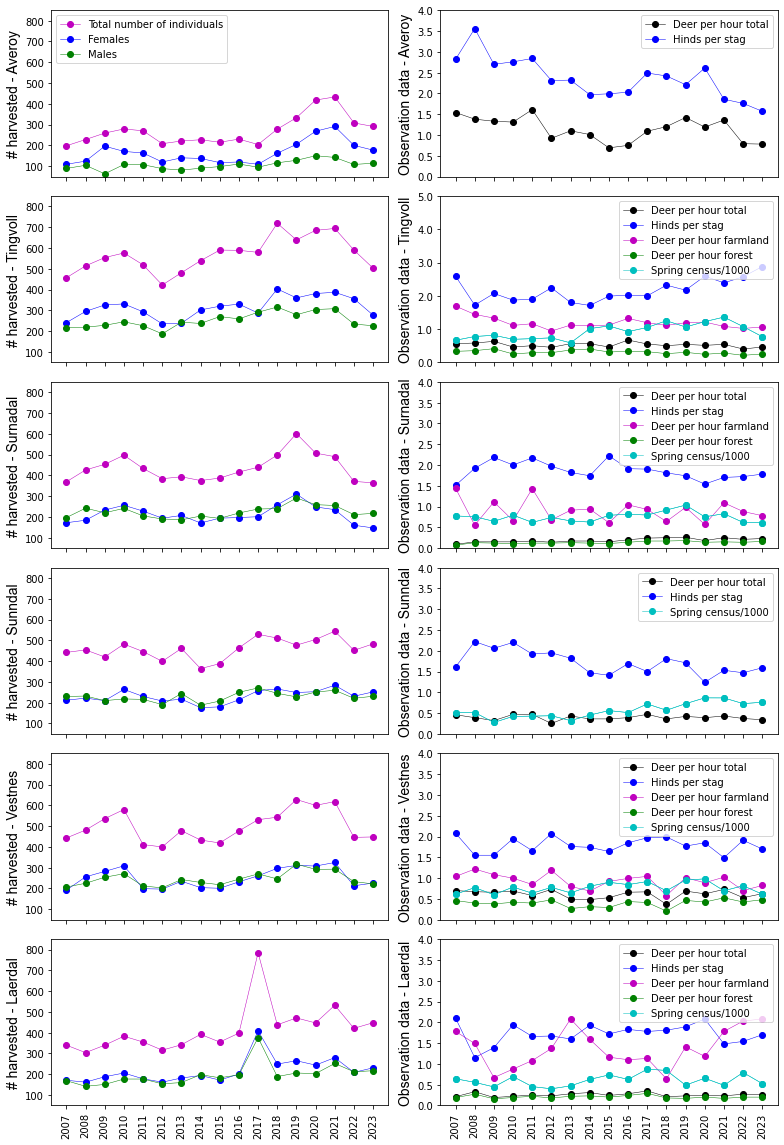

In [13]:
fig, ax = plt.subplots(6, 2, figsize=(11, 17))
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

axis = [
    [ax[0][0], ax[0][1]],
    [ax[1][0], ax[1][1]],
    [ax[2][0], ax[2][1]],
    [ax[3][0], ax[3][1]],
    [ax[4][0], ax[4][1]],
    [ax[5][0], ax[5][1]],
]

i = 0
for municipality in municipalities:
    [
        municipality,
        first_year,
        last_year,
        number_of_years,
        years,
        seen_deer_obs,
        seen_deer_obs_forest,
        seen_deer_obs_farmland,
        hinds_per_stag_obs,
        total_harvest,
        total_quota,
        fraction_female_calves_harvested,
        fraction_young_hinds_harvested,
        fraction_adult_hinds_harvested,
        fraction_male_calves_harvested,
        fraction_young_stags_harvested,
        fraction_adult_stags_harvested,
        spring_counts,
    ] = data_municipality[i]

    # Transforming the above fractional data to numbers
    number_harvested_female_calves = np.round(
        np.multiply(np.array(fraction_female_calves_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_male_calves = np.round(
        np.multiply(np.array(fraction_male_calves_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_young_hinds = np.round(
        np.multiply(np.array(fraction_young_hinds_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_adult_hinds = np.round(
        np.multiply(np.array(fraction_adult_hinds_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_young_stags = np.round(
        np.multiply(np.array(fraction_young_stags_harvested), np.array(total_harvest))
        / 100
    )
    number_harvested_adult_stags = np.round(
        np.multiply(np.array(fraction_adult_stags_harvested), np.array(total_harvest))
        / 100
    )

    time_axis = np.arange(number_of_years)

    # Plotting the three graphs in the left figure panels
    females_harvested = (
        number_harvested_female_calves
        + number_harvested_young_hinds
        + number_harvested_adult_hinds
    )
    males_harvested = (
        number_harvested_male_calves
        + number_harvested_young_stags
        + number_harvested_adult_stags
    )

    axis[i][0].plot(
        time_axis, total_harvest, "mo", markersize=6, linestyle="-", linewidth=0.5
    )
    axis[i][0].plot(
        time_axis,
        females_harvested,
        "bo",
        markersize=6,
        linestyle="-",
        linewidth=0.5,
    )
    axis[i][0].plot(
        time_axis,
        males_harvested,
        "go",
        markersize=6,
        linestyle="-",
        linewidth=0.5,
    )

    axis[i][0].set_xticks(time_axis)
    axis[i][0].set_xticklabels([])
    if municipality == "Laerdal":
        axis[i][0].set_xticks(time_axis)
        axis[i][0].set_xticklabels(years, rotation="vertical")

    ymin = 50
    ymax = 850
    ax[i][0].set_ylim([ymin, ymax])
    axis[i][0].set_ylabel("# harvested" + " - " + municipality, fontsize=14, **afont)

    if municipality == "Averoy":
        axis[i][0].legend(
            ["Total number of individuals", "Females", "Males"], loc="upper left"
        )

    # Plotting graphs in the right figure panel - must deal with missing data
    axis[i][1].plot(
        time_axis, seen_deer_obs, "ko", markersize=6, linestyle="-", linewidth=0.5
    )
    axis[i][1].plot(
        time_axis, hinds_per_stag_obs, "bo", markersize=6, linestyle="-", linewidth=0.5
    )
    if municipality == "Averoy":
        axis[i][1].legend(["Deer per hour total", "Hinds per stag"], loc="upper right")

    if (
        (municipality == "Tingvoll")
        | (municipality == "Surnadal")
        | (municipality == "Vestnes")
        | (municipality == "Laerdal")
    ):
        axis[i][1].plot(
            time_axis,
            seen_deer_obs_farmland,
            "mo",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )
        axis[i][1].plot(
            time_axis,
            seen_deer_obs_forest,
            "go",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )
        axis[i][1].plot(
            time_axis,
            np.array(spring_counts) / 1000,
            "co",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )
        axis[i][1].legend(
            [
                "Deer per hour total",
                "Hinds per stag",
                "Deer per hour farmland",
                "Deer per hour forest",
                "Spring census/1000",
            ],
            loc="upper right",
        )
    if municipality == "Sunndal":
        axis[i][1].plot(
            time_axis,
            np.array(spring_counts) / 1000,
            "co",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )
        axis[i][1].legend(
            ["Deer per hour total", "Hinds per stag", "Spring census/1000"],
            loc="upper right",
        )

    if municipality != "Averoy":
        axis[i][1].plot(
            time_axis,
            np.array(spring_counts) / 1000,
            "co",
            markersize=6,
            linestyle="-",
            linewidth=0.5,
        )

    axis[i][1].set_xticks(time_axis)
    axis[i][1].set_xticklabels([])
    if municipality == "Laerdal":
        axis[i][1].set_xticks(time_axis)
        axis[i][1].set_xticklabels(years, rotation="vertical")

    ymin = 0
    if municipality == "Tingvoll":
        ymax = 5.0
        axis[i][1].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    else:
        ymax = 4.0

    ax[i][1].set_ylim([ymin, ymax])
    axis[i][1].set_ylabel(
        "Observation data" + " - " + municipality, fontsize=14, **afont
    )

    # ax[0].margins(x=0)
    # ax[0].margins(x=0)

    fig.tight_layout()
    fig.subplots_adjust(top=0.93)

    i = i + 1

save_dir = "figures/"
plt.savefig(save_dir + "Figure_2.pdf", dpi=600, bbox_inches="tight")

pass;